In [27]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook
from datasketch import HyperLogLog
from datasketch import HyperLogLogPlusPlus

First of all we are going to load the file as an adjacency list using a dictionary. The ```LiveJournal``` graph is described as an undirected graph and it contains a single instance for every edge, so we are going to consider, for every edge, both the two directions in order to build the complete adjacency lists.

In [28]:
nod_dic = {}

with open("graph.txt", 'r') as adj_list_file:

    lines = adj_list_file.readlines()
    
    for edge in tqdm_notebook(lines):    
        values = edge.strip().split() 

        u = values[0]
        v = values[1]

        if u in nod_dic:
            nod_dic[u].append(v)
        else:
            nod_dic[u] = list()
            nod_dic[u].append(v)
            
        if v in nod_dic:
            nod_dic[v].append(u)
        else:
            nod_dic[v] = list()
            nod_dic[v].append(u)
                

print('Adjacency lists dictionary has been created')

HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

Adjacency lists dictionary has been created


Now we are going to build a data structure which will contain a **_HyperLogLog_** sketch for every node of the graph.
We can change the value of p in order to increase the precision of the estimate.

Furthermore we are going to initialize every counter with the number of nodes at distance $0$ from every node, i.e. we are stating

$$
IN(u,0)=\{u\}
$$

Then we also initialize a list in order to take trace of the average number of neighbours for each node, for each distance value.

In [29]:
c = {}
p = 16 ## 4<=p<=16

avg_list = list()
average = 0

for i in tqdm_notebook(nod_dic):
    c[i] = HyperLogLog(p)
    c[i].update(str(i).encode('utf8'))
    average = average + c[i].count()

avg_list.append(average/len(c))
    
print("len(c):", len(c))
    
## c contains a HyperLogLog for every node (index corresponding to the node identifier)

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

len(c): 32


The following code manages the iterations over the distances and updates, at every iteration, the whole HyperLogLog counters for all the nodes of the graph. For a detailed explanation refer to:
- Palmer, Gibbons, and Faloutsos. ANF: A fast and scalable tool for data mining in massive graphs. *Proceedings of the eighth ACM SIGKDD international conference on Knowledge discovery and data mining*, pages 81-90 ACM, 2002.
- Boldi, Rosa, and Vigna. HyperANF: Approximating the Neighbourhood Function of Very Large Graphs on a Budget. *Proceedings of the 20th international conference on World wide web*, pages 625-634 ACM, 2011.

In [30]:
temp_dic = {}
d = 10
m = 0

for k in range(d):
    average = 0
    print("Computing INF for distance", k+1, "...")
    for v in tqdm_notebook(nod_dic):
        m = c[v]

        for w in nod_dic[v]:
            m = HyperLogLog.union(c[w], m) 
            
        ## we take trace of the values for the next update of c
        temp_dic[v] = m
   
    ## we update the average for the given distance
    for i in tqdm_notebook(nod_dic):
        c[i] = temp_dic[i]
        average = average + c[i].count()
     
    avg_list.append(average/len(c))

Computing INF for distance 1 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 2 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 3 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 4 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 5 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 6 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 7 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 8 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 9 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

Computing INF for distance 10 ...


HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

In [31]:
##print(avg_list)
print("Average Neighbourhood Function values for every distance")
for i in range(len(avg_list)):
    print(i, ":", avg_list[i])

Average Neighbourhood Function values for every distance
0 : 1.0000076294721394
1 : 3.500104908986232
2 : 7.5630164686854195
3 : 12.501350614698744
4 : 17.189976240692552
5 : 20.315902548723805
6 : 22.629160028675276
7 : 24.754926118591623
8 : 26.38053098600767
9 : 27.818576706502423
10 : 29.069064710239335


In [32]:
#for i in nod_dic:
#    print("Vertex", i)
#    print("Neighbourhood at distance %d:" %(d), c[i].count())

Let's plot the values of the estimated average number of neighbours (according to the total number of vertices in the graph) for increasing values of distance.

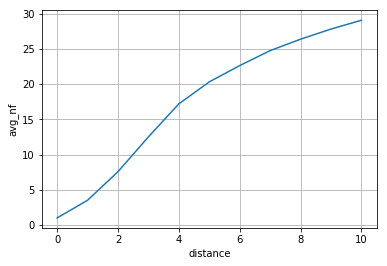

In [33]:
plt.plot(list(range(d+1)), avg_list)
plt.ylabel('avg_nf')
plt.xlabel('distance')
plt.grid(True)
plt.show()